<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practicas/blob/main/Practica3_MaldicionDimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Práctica 3**

## Maldición de la dimensionalidad



### Importando librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

### Importando datos

In [2]:
data = np.load("proyecto_training_data.npy")

In [3]:
columns = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df = pd.DataFrame(data, columns=columns)

In [4]:
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [5]:
columns_ = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

### Generando función para analizar el comportamiento del dataset con el grado del polinomio a utilizar con la función PolynomialFeatures

In [6]:
def lista_features(df, g_polinomio):
  lista_f = []
  for i in range(1,g_polinomio+1):
    lista_g = []
    for j in range(1,g_polinomio+1):
      grado = PolynomialFeatures(i)
      features = grado.fit_transform(df[columns_[:j]])
      lista_g.append(features.shape[1])
    lista_f.append(lista_g)
  return lista_f

In [7]:
lista = lista_features(df[columns[1:]], 3)

### Representando datos obtenidos como un DataFrame

In [8]:
res = pd.DataFrame(lista, index=['Grado 1', 'Grado 2', 'Grado 3'], columns=['1 Variable', '2 Variables', '3 Variables'])
res

,1 Variable,2 Variables,3 Variables
Grado 1,2,3,4
Grado 2,3,6,10
Grado 3,4,10,20


### Gráficas de los resultados obtenidos

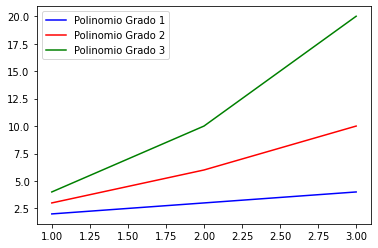

In [13]:
x = np.linspace(1,3,3)
fig, ax = plt.subplots()
ax.plot(x, res['1 Variable'], '-b', label='Polinomio Grado 1')
ax.plot(x, res['2 Variables'], '-r', label='Polinomio Grado 2')
ax.plot(x, res['3 Variables'], '-g', label='Polinomio Grado 3')
leg = ax.legend();

## Conclusiones

- Se tiene que al momento de que se aumentan el número de features, la cantidad de parámetros puede incrementar muy rápidamente.
- Al aumentar la cantidad de parámetros entrenables incrementa la posibilidad de que el modelo sufra de overfitting y este tenga un error de generalización mayor de lo deseado.
- Se obtiene que al calcular las features polinómicas, al momento de incrementar el grado del polinomio y el número de features con el que se desea modelar los datos la cantidad de parámetros incrementa rápidamente.
- Se tiene que para un polinomio de grado 3 y empleando 3 variables de entrada se tiene que la cantidad total de features obtenidas es de 20. 
- Se concluye que la maldición de la dimensionalidad, se produce al momento de aumentar el número de dimensiones para elaborar un modelo, y se puede llegar a tener una gran cantidad de features e información esparcida.